# Histogram equalization and matching
----
`Roll: CS20B1016, Name: V Nagasai`

----

**<u>Problem Statement:</u>**

1. Do histogram equalization on pout-dark and display the same.
2. Do histogram matching (specification) on the pout-dark image, keeping pout-bright image as a reference image.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

In [4]:
#Function for plotting array of images
def plot_images(images, rows, cols, imageTitles=[]):
	if(len(imageTitles) == 0):
		imageTitles = [f'Image {i}' for i in range(1, rows*cols + 1)]
	plt.figure(figsize=(2.2*cols, 2.2*rows))
	plt.subplots_adjust(bottom=0.0, left=.01, right=.99, top=.90, hspace=.20)
	for i in range(rows*cols):
		plt.subplot(rows, cols, i+1)
		plt.imshow(images[i], cmap="gray")
		plt.title(imageTitles[i])
		plt.axis("off")

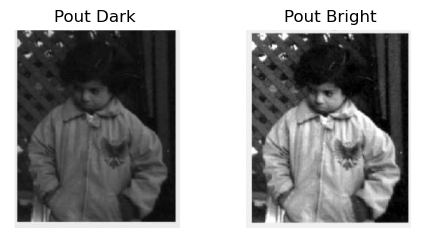

In [5]:
pout_dark = cv2.imread("pout-dark.jpg")
pout_dark = cv2.cvtColor(pout_dark, cv2.COLOR_BGR2GRAY)
pout_bright = cv2.imread("pout-bright.jpg")
pout_bright = cv2.cvtColor(pout_bright, cv2.COLOR_BGR2GRAY)
plot_images([pout_dark, pout_bright], 1, 2, ["Pout Dark", "Pout Bright"])

In [6]:
def histogram_equalization(img:np.ndarray):
	'''
	Function which performs histogram equalization and returns the equalized values of those pixels
	'''
	f_img = img.flatten()
	L = 2**int(max(f_img)).bit_length()
	unique = np.unique(f_img)
	n = len(f_img)
	cum_dist, equalized_vals = np.empty(256), np.empty(256)
	for i in range(256):
		if i in unique:
			count = np.count_nonzero(f_img == i)
			prob = count/n
			cum_dist[i] = prob + cum_dist[i-1] if i != 0 else prob
		else:
			cum_dist[i] = cum_dist[i-1] if i != 0 else 0
		equalized_vals[i] = round(cum_dist[i] * (L-1))
	return np.array(equalized_vals)

def map_equalized(img: np.ndarray, equalized_vals: np.ndarray):
	'''
	Function which maps equalized values to the original pixel values and returns a new mapped 
	'''
	m, n = img.shape
	equalized_img = np.empty((m, n))
	for i in range(m):
		for j in range(n):
			old_val = img[i][j]
			new_val = equalized_vals[old_val]
			equalized_img[i][j] = new_val
	return equalized_img

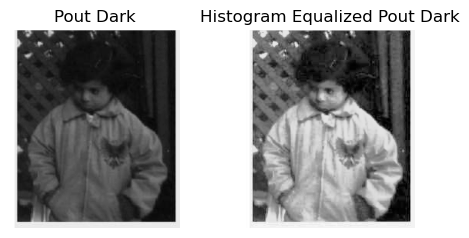

In [7]:
equalized_pout_dark = map_equalized(pout_dark, histogram_equalization(pout_dark))
plot_images([pout_dark, equalized_pout_dark], 1, 2, ["Pout Dark", "Histogram Equalized Pout Dark"])

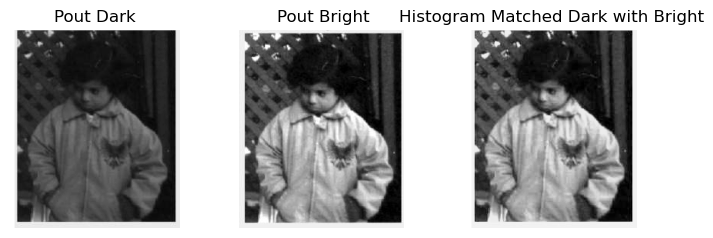

In [8]:
def find_nearest(value, arr: np.ndarray):
	'''
	Function which finds index of first 'x' in array which is greater than or equal to value
	'''
	for i, x in enumerate(arr):
		if x >= value:
			return i
	return -1

def map_matched(img: np.ndarray, target_equalized_vals: np.ndarray, reference_equalized_vals: np.ndarray):
	'''
	Function which matches equalized values to the reference values and maps back to the original values
	'''
	m, n = img.shape
	matched_img = np.empty((m, n))
	for i  in range(m):
		for j in range(n):
			old_val = img[i][j]
			new_val = find_nearest(target_equalized_vals[old_val], reference_equalized_vals)
			matched_img[i][j] = new_val
	return matched_img

matched_pout_dark = map_matched(pout_dark, histogram_equalization(pout_dark), histogram_equalization(pout_bright))
plot_images([pout_dark, pout_bright, matched_pout_dark], 1, 3, ["Pout Dark", "Pout Bright", "Histogram Matched Dark with Bright"])

# Built in methods

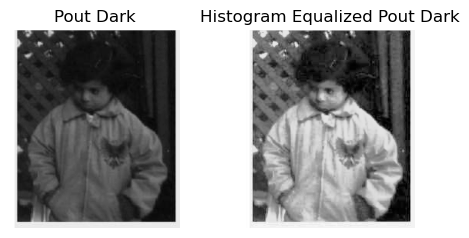

In [9]:
equ = cv2.equalizeHist(pout_dark)
plot_images([pout_dark, equ], 1, 2, ["Pout Dark", "Histogram Equalized Pout Dark"])

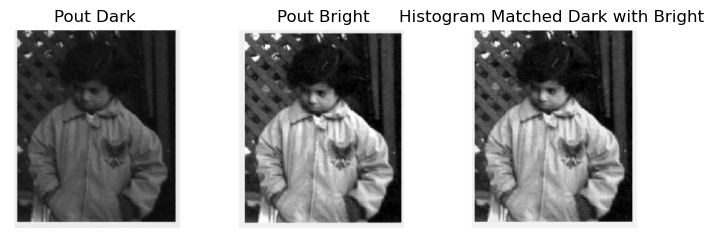

In [11]:
match = match_histograms(pout_dark, pout_bright)
plot_images([pout_dark, pout_bright, match], 1, 3, ["Pout Dark", "Pout Bright", "Histogram Matched Dark with Bright"])